# Projeto 2: Classificação binária brest cancer com validação cruzada e dropout

## Etapa 1: Importação das bibliotecas

In [4]:
#!pip install skorch

In [5]:
import pandas as pd
import numpy as np
import torch.nn as nn        
from skorch import NeuralNetBinaryClassifier
import torch
import seaborn as sns
from sklearn.model_selection import cross_val_score
torch.__version__
#pip install torch==1.4.0

'1.6.0'

## Etapa 2: Base de dados

In [26]:
np.random.seed(123)
torch.manual_seed(123)

In [27]:
previsores = pd.read_csv('../Bases/entradas_breast.csv')
classe = pd.read_csv('../Bases/saidas_breast.csv')

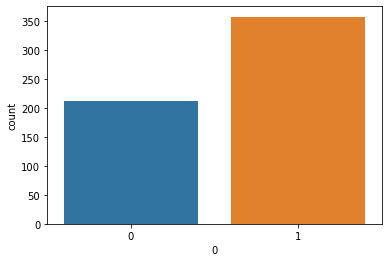

In [28]:
sns.countplot(classe['0']);

In [29]:
classe.shape

(569, 1)

In [30]:
previsores = np.array(previsores, dtype='float32')
classe = np.array(classe, dtype='float32').squeeze(1)

In [31]:
classe.shape

(569,)

In [32]:
type(previsores)

numpy.ndarray

In [33]:
type(classe)

numpy.ndarray

## Etapa 3: Classe para estrutura da rede neural

In [34]:
class classificador_torch(nn.Module):
  def __init__(self):
    super().__init__()

    # 30 -> 16 -> 16 -> 1
    self.dense0 = nn.Linear(30, 16)
    torch.nn.init.uniform_(self.dense0.weight)
    self.activation0 = nn.ReLU()
    self.dense1 = nn.Linear(16, 16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()
    self.dense2 = nn.Linear(16, 1)
    torch.nn.init.uniform_(self.dense2.weight)
    self.output = nn.Sigmoid()

  def forward(self, X):
    X = self.dense0(X)
    X = self.activation0(X)
    X = self.dense1(X)
    X = self.activation1(X)
    X = self.dense2(X)
    X = self.output(X)
    return X

## Etapa 4: Skorch

In [35]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  criterion=torch.nn.BCELoss,
                                                  optimizer=torch.optim.Adam,
                                                  lr=0.001,
                                                  optimizer__weight_decay=0.0001,
                                                  max_epochs=100,
                                                  batch_size=10,
                                                  train_split=False)

## Etapa 5: Validação cruzada

In [36]:
resultados = cross_val_score(classificador_sklearn, previsores, classe, cv = 10, scoring = 'accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1       37.1094  0.0444
      2       37.1094  0.0449
      3       37.1094  0.0449
      4       37.1094  0.0439
      5       37.1094  0.0439
      6       37.1094  0.0459
      7       37.1094  0.0439
      8       37.1094  0.0441
      9       37.1094  0.0449
     10       37.1094  0.0444
     11       37.1094  0.0439
     12       37.1094  0.0429
     13       37.1094  0.0439
     14       37.1094  0.0509
     15       37.1094  0.0499
     16       37.1094  0.0439
     17       37.1094  0.0439
     18       37.1094  0.0439
     19       37.1094  0.0439
     20       37.1094  0.0439
     21       37.1094  0.0439
     22       37.1094  0.0449
     23       37.1094  0.0449
     24       37.1094  0.0439
     25       13.5893  0.0439
     26        0.5466  0.0439
     27        0.5314  0.0439
     28        0.4981  0.0439
     29        0.4820  0.0464
     30        0.4769  0.0449
     31        0.4528  0.0424
     32   

IndexError: too many indices for array

In [17]:
resultados.shape

NameError: name 'resultados' is not defined

In [18]:
resultados

NameError: name 'resultados' is not defined

In [19]:
media = resultados.mean()
media

NameError: name 'resultados' is not defined

In [20]:
desvio = resultados.std()
desvio

NameError: name 'resultados' is not defined

## Etapa 6: Dropout

In [21]:
class classificador_torch(nn.Module):
  def __init__(self):
    super().__init__()

    # 30 -> 16 -> 16 -> 1
    self.dense0 = nn.Linear(30, 16)
    torch.nn.init.uniform_(self.dense0.weight)
    self.activation0 = nn.ReLU()
    self.dropout0 = nn.Dropout(0.2)
    self.dense1 = nn.Linear(16, 16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()
    self.dropout1 = nn.Dropout(0.2)
    self.dense2 = nn.Linear(16, 1)
    torch.nn.init.uniform_(self.dense2.weight)
    self.output = nn.Sigmoid()

  def forward(self, X):
    X = self.dense0(X)
    X = self.activation0(X)
    X = self.dropout0(X)
    X = self.dense1(X)
    X = self.activation1(X)
    X = self.dropout1(X)
    X = self.dense2(X)
    X = self.output(X)
    return X

In [22]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  criterion=torch.nn.BCELoss,
                                                  optimizer=torch.optim.Adam,
                                                  lr=0.001,
                                                  optimizer__weight_decay=0.0001,
                                                  max_epochs=100,
                                                  batch_size=10,
                                                  train_split=False)

In [23]:
resultados = cross_val_score(classificador_sklearn, previsores, classe, cv = 10, scoring = 'accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1       37.1094  0.2139
      2       37.1094  0.0518
      3       37.1094  0.0484
      4       37.1094  0.0479
      5       37.1094  0.0494
      6       37.1094  0.0489
      7       37.1094  0.0509
      8       37.1094  0.0499
      9       37.1094  0.0489
     10       37.1094  0.0489
     11       37.1094  0.0489
     12       37.1094  0.0489
     13       37.1094  0.0489
     14       37.1094  0.0489
     15       37.1094  0.0485
     16       37.1094  0.0489
     17       37.1094  0.0479
     18       37.1094  0.0479
     19       37.1094  0.0481
     20       37.1094  0.0489
     21       37.1094  0.0479
     22       37.1094  0.0474
     23       37.1094  0.0479
     24       37.1094  0.0479
     25       37.1094  0.0489
     26       37.1094  0.0489
     27       37.1094  0.0499
     28       37.1094  0.0489
     29       37.1094  0.0549
     30       36.0950  0.0489
     31        4.9728  0.0499
     32   

IndexError: too many indices for array

In [24]:
media = resultados.mean()
desvio = resultados.std()
media, desvio

NameError: name 'resultados' is not defined

In [25]:
resultados

NameError: name 'resultados' is not defined